<a href="https://colab.research.google.com/github/suvankit/Fake_reviews_classification/blob/main/Fake_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Overview

In [ ]:
import pandas as pd
import nltk

In [ ]:
text = pd.read_csv('/content/mobies.csv')

In [ ]:
text.head()

,Unnamed: 0,name,url,price,review_date,review_header,review_author,reviews_text,review_rating
0,0,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,Masterpiece,Govinda Dasa,A silently launched masterpiece by Samsung. No...,5.0
1,1,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,Not the value for money,Mukesh,No NFC No water resistance Poor camera quality...,1.0
2,2,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,01 Mar 2019,Redmi note 7 pro is much better than this,Aman,This phone is quite good but I think I have ch...,2.0
3,3,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,24 Mar 2019,Good Phone -Very Happy! (Practical and Honest ...,Kindle Customer,I had Redmi Note 5 pro and I wanted to buy Red...,4.0
4,4,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,BEST PHONE OF THE YEAR👑👑👑,shalin patel,i was use of mi phone before a long time...but...,5.0


In [ ]:
text["reviews_text"][0]

'A silently launched masterpiece by Samsung. No Ads. No Pre-information. Fearing S10 sales? Or hurryingly released to beat Redmi Note 7? Anyways. Let us see the pros & cons: Pros: 1) Display: The best display in the market till date. It is a known fact (through internet sources) that Samsung manufactures display for iPhones, the world\'s costliest phones. So as usual, they stand superb in this Super AMOLED display with Full HD+. 2) Backup Beast: 4000 mAH battery will last: 3 days for light users; 2 days for moderate users; 1 day for heavy users. 3) Full Screen: Display is almost full. Just a small and perfectly placed camera in the middle - U Notch. I felt this is far better than abnormal camera placements in S10 series. 4) Fantastic Camera: In the light, whether the rear camera or front camera, both are excellent while producing 25 MP pics. See the sample shots at 3rd and 4th images of Lord Krishna. 5) Great Design: As usually, A series from Samsung always look very premium. And this 

In [ ]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1694 non-null   int64  
 1   name           1694 non-null   object 
 2   url            1694 non-null   object 
 3   price          1157 non-null   object 
 4   review_date    1694 non-null   object 
 5   review_header  1691 non-null   object 
 6   review_author  1694 non-null   object 
 7   reviews_text   1694 non-null   object 
 8   review_rating  1691 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 119.2+ KB


In [ ]:
#print(pd.unique(text['name']).sum())
text.name.nunique(dropna = True)

225

In [ ]:
# Determine how many missing values exist in the collection, in which case you can use .sum() chained onto is.na()
null_values=text.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(text)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
price,537,31.700
review_header,3,0.177
review_rating,3,0.177
Unnamed: 0,0,0.000
name,0,0.000
url,0,0.000
review_date,0,0.000
review_author,0,0.000
reviews_text,0,0.000


In [ ]:
text=text.dropna()
text.shape

(1157, 9)

In [ ]:
text.head()

,Unnamed: 0,name,url,price,review_date,review_header,review_author,reviews_text,review_rating
0,0,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,Masterpiece,Govinda Dasa,A silently launched masterpiece by Samsung. No...,5.0
1,1,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,Not the value for money,Mukesh,No NFC No water resistance Poor camera quality...,1.0
2,2,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,01 Mar 2019,Redmi note 7 pro is much better than this,Aman,This phone is quite good but I think I have ch...,2.0
3,3,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,24 Mar 2019,Good Phone -Very Happy! (Practical and Honest ...,Kindle Customer,I had Redmi Note 5 pro and I wanted to buy Red...,4.0
4,4,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,BEST PHONE OF THE YEAR👑👑👑,shalin patel,i was use of mi phone before a long time...but...,5.0


In [ ]:
text.drop(['name','url','price','review_date','review_author'],axis=1,inplace=True)

In [ ]:
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating
0,0,Masterpiece,A silently launched masterpiece by Samsung. No...,5.0
1,1,Not the value for money,No NFC No water resistance Poor camera quality...,1.0
2,2,Redmi note 7 pro is much better than this,This phone is quite good but I think I have ch...,2.0
3,3,Good Phone -Very Happy! (Practical and Honest ...,I had Redmi Note 5 pro and I wanted to buy Red...,4.0
4,4,BEST PHONE OF THE YEAR👑👑👑,i was use of mi phone before a long time...but...,5.0


# Pre-Processing of review_text

In [ ]:
#remove urls

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

import re
import string

text['reviews_text'] = text['reviews_text'].apply(lambda x: remove_url(x))

In [ ]:
#remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

text['reviews_text'] = text['reviews_text'].apply(lambda x: remove_html(x))

In [ ]:
#making lower case
text['reviews_text'] = text['reviews_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['reviews_text'].head()

0    a silently launched masterpiece by samsung. no...
1    no nfc no water resistance poor camera quality...
2    this phone is quite good but i think i have ch...
3    i had redmi note 5 pro and i wanted to buy red...
4    i was use of mi phone before a long time...but...
Name: reviews_text, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Tokenization

In [ ]:
#Tokenization
def identify_tokens(row):
    review = row['reviews_text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

text['words'] = text.apply(identify_tokens, axis=1)

## Stemming

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

text['stemmed_words'] = text.apply(stem_list, axis=1)

In [ ]:
text['stemmed_words']

0       [a, silent, launch, masterpiec, by, samsung, n...
1       [no, nfc, no, water, resist, poor, camera, qua...
2       [thi, phone, is, quit, good, but, i, think, i,...
3       [i, had, redmi, note, pro, and, i, want, to, b...
4       [i, wa, use, of, mi, phone, befor, a, long, ti...
                              ...                        
1665    [accessori, that, were, promis, were, not, del...
1666    [i, got, thi, mobil, day, back, now, i, am, fa...
1667    [problem, even, in, full, call, volum, the, so...
1668    [thi, phone, to, be, bad, not, touch, work, th...
1669    [when, i, got, the, box, clear, soft, case, is...
Name: stemmed_words, Length: 1157, dtype: object

## Stop Words removal

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing stop words
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

text['stem_meaningful'] = text.apply(remove_stops, axis=1)

In [ ]:
text['stem_meaningful']

0       [silent, launch, masterpiec, samsung, ad, fear...
1       [nfc, water, resist, poor, camera, qualiti, fr...
2       [thi, phone, quit, good, think, choosen, wrong...
3       [redmi, note, pro, want, buy, redmi, note, pro...
4       [wa, use, mi, phone, befor, long, time, one, d...
                              ...                        
1665    [accessori, promis, deliv, parcel, contain, on...
1666    [got, thi, mobil, day, back, face, issu, thi, ...
1667    [problem, even, full, call, volum, sound, clea...
1668    [thi, phone, bad, touch, work, thi, phone, tou...
1669    [got, box, clear, soft, case, miss, box, altho...
Name: stem_meaningful, Length: 1157, dtype: object

In [ ]:
#Rejoin words
def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

text['processed'] = text.apply(rejoin_words, axis=1)

In [ ]:
text['processed']

0       silent launch masterpiec samsung ad fear sale ...
1       nfc water resist poor camera qualiti front cam...
2       thi phone quit good think choosen wrong devic ...
3       redmi note pro want buy redmi note pro got rea...
4       wa use mi phone befor long time one day friend...
                              ...                        
1665    accessori promis deliv parcel contain onli pho...
1666    got thi mobil day back face issu thi mobil nee...
1667    problem even full call volum sound clearli aud...
1668        thi phone bad touch work thi phone touch work
1669    got box clear soft case miss box although ment...
Name: processed, Length: 1157, dtype: object

## Pre-processed review_text

In [ ]:
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed
0,0,Masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...
1,1,Not the value for money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...
2,2,Redmi note 7 pro is much better than this,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...
3,3,Good Phone -Very Happy! (Practical and Honest ...,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...
4,4,BEST PHONE OF THE YEAR👑👑👑,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...


In [ ]:
#If there is any row having data in any other type than string it will change that to a string
for i in range(0,len(text)-1):
    if type(text.iloc[i]['processed']) != str:
        text.iloc[i]['processed'] = str(products.iloc[i]['processed'])

In [ ]:
from textblob import TextBlob
text['processed'].apply(lambda x: str(TextBlob(x).correct()))

0       silent launch masterpiece samson ad fear sale ...
1       of water resist poor camera quality front can ...
2       the phone quit good think chosen wrong devil c...
3       red note pro want buy red note pro got really ...
4       wa use mi phone before long time one day frien...
                              ...                        
1665    accessory promise devil parcel contain only ph...
1666    got the mobile day back face issue the mobile ...
1667    problem even full call volume sound clearly au...
1668        the phone bad touch work the phone touch work
1669    got box clear soft case miss box although ment...
Name: processed, Length: 1157, dtype: object

# Pre-Processing of the review_header

In [ ]:
#lower case
text['review_header'] = text['review_header'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['review_header'].head()

0                                          masterpiece
1                              not the value for money
2            redmi note 7 pro is much better than this
3    good phone -very happy! (practical and honest ...
4                            best phone of the year👑👑👑
Name: review_header, dtype: object

In [ ]:
#removing punctuation
text['review_header'] = text['review_header'].str.replace('[^\w\s]','')
text['review_header'].head()

0                                          masterpiece
1                              not the value for money
2            redmi note 7 pro is much better than this
3    good phone very happy practical and honest review
4                               best phone of the year
Name: review_header, dtype: object

## Stop Words

In [ ]:
#removal of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['review_header']  = text['review_header'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text['review_header'].sample(10)

1222                                       awesome device
1340                        honest review edm music lover
578                         perfect feature phone samsung
904                                          worst camera
330             mi a2 failure modelafter replacement fine
24                            late charging issue battery
117     phone ring volume get adjusted switching mode ...
247             stylish comfortable true wireless freedom
111                                  good per observation
1316                                note 9 speaker issues
Name: review_header, dtype: object

## Emojis removal

In [ ]:
#remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

text['review_header'] = text['review_header'].apply(lambda x: remove_emoji(x))

In [ ]:
!pip install emot

In [ ]:
#remove emoticons
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
    
text['review_header'] = text['review_header'].apply(lambda x: remove_emoticons(x))

In [ ]:
#spelling correction
from textblob import TextBlob
text['review_header'].apply(lambda x: str(TextBlob(x).correct()))

0                                    masterpiece
1                                    value money
2                     red note 7 pro much better
3       good phone happy practical honest review
4                                best phone year
                          ...                   
1665                       accessories delivered
1666          defective product need replacement
1667                                    note pro
1668                            touch work phone
1669                      back cover missing box
Name: review_header, Length: 1157, dtype: object

# SA on polarity and subjectivity

In [ ]:
def combined_features(row):
    return row['review_header'] + ' '+ row['processed']
text['reviews'] = text.apply(combined_features, axis=1)
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,reviews
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...


In [ ]:
from textblob import TextBlob

text['reviews'] = text['reviews'] .astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


text['polarity'] = text['reviews'] .apply(pol)
text['subjectivity'] = text['reviews'] .apply(sub)
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,reviews,polarity,subjectivity
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...,0.221396,0.464330
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...,-0.016667,0.530556
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...,0.350000,0.650000
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...,0.301146,0.537611
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...,0.737500,0.325000


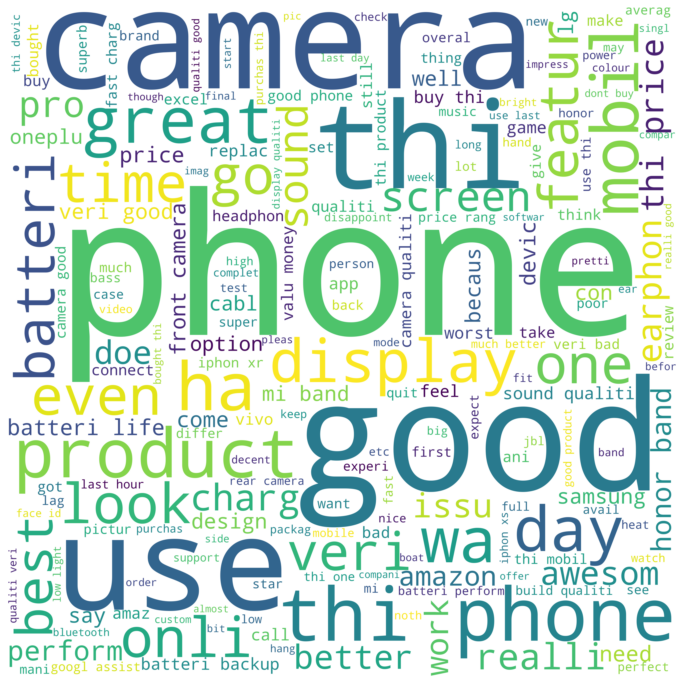

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
cloud = ' '.join([x for x in text['reviews']])
wordcloud = WordCloud(width=5000,height=5000,background_color='white',stopwords=STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# classifying positive,negative,neutral reviews on the basis on polarity
#function to comput negative,positive,neutal analysis
def Analysis(score):
  if score>0:
    return 'Positive'
  elif score==0:
    return 'Neutral'
  else:
    return 'Negative'

text['analysis'] = text['polarity'].apply(Analysis)

text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,reviews,polarity,subjectivity,analysis
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...,0.221396,0.464330,Positive
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...,-0.016667,0.530556,Negative
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...,0.350000,0.650000,Positive
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...,0.301146,0.537611,Positive
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...,0.737500,0.325000,Positive


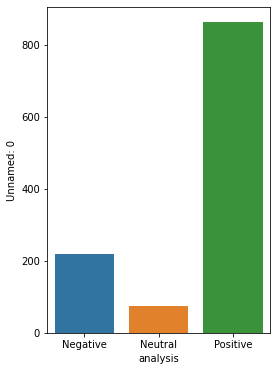

In [ ]:
import seaborn as sns
a = text.groupby(['analysis'])['Unnamed: 0'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'number of samples'})
fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x='analysis', y='Unnamed: 0', data=a)

In [ ]:
text.shape[0]

1157

In [ ]:
# plt.figure(figsize=(8,8))
# for i in range(0,text.shape[0]):
#   plt.scatter(text['polarity'][i],text['subjectivity'][i],color='Blue')

# plt.title('sentiment analysis')
# plt.xlabel('polarity')
# plt.ylabel('subjectivity')
# plt.show()

In [ ]:
review_pos = text[text["analysis"]=='Positive'].dropna()
review_neu = text[text["analysis"]=='Neutral'].dropna()
review_neg = text[text["analysis"]=='Negative'].dropna()


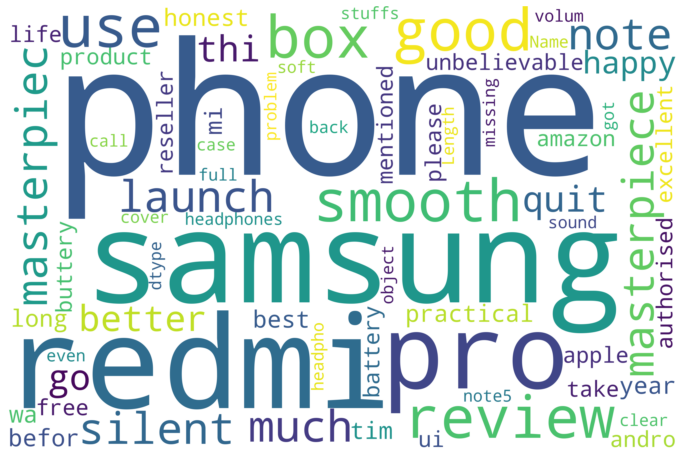

In [ ]:
#frequent words in positive reviews 
cloud = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

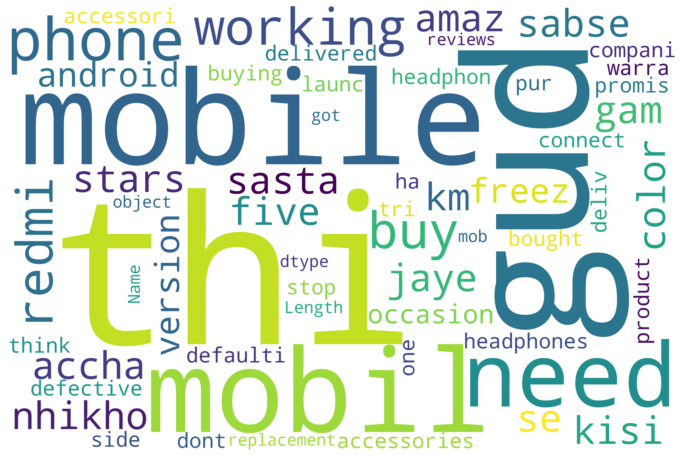

In [ ]:
#frequent words in neutral reviews
cloud = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

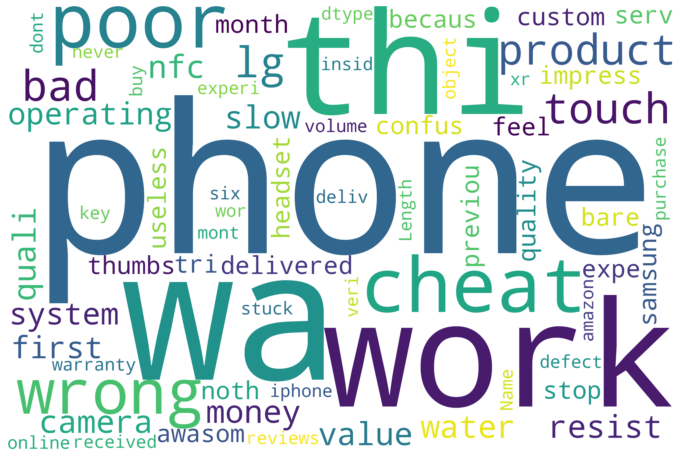

In [ ]:
#frequent words in negative reviews
cloud = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

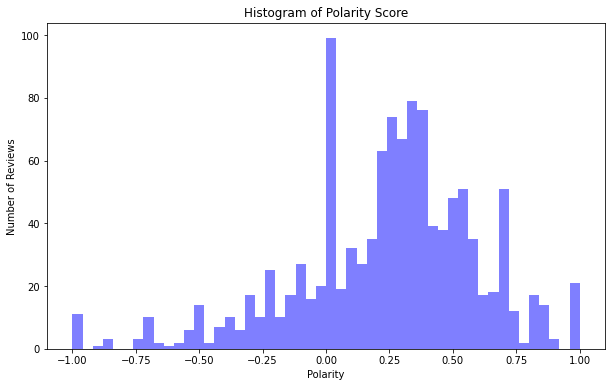

In [ ]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(text.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

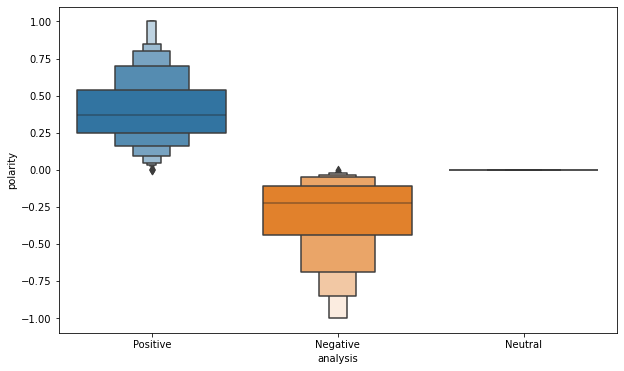

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='analysis', y='polarity', data=text)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

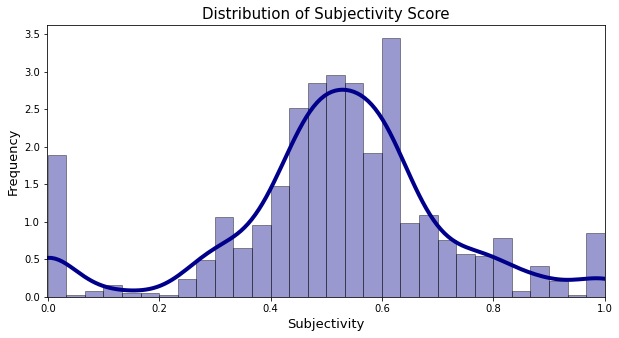

In [ ]:
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
plt.figure(figsize=(10,5))
sns.distplot(text['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

When it is close to 0, it is more about facts. When subjectivity increases, it comes close to be an opinion. In the data set, the distribution of subjectivity scores for the reviews are similar to a normal distribution.

In [ ]:
text.loc[(text["analysis"] == 1) & (text.polarity == 1 ) & (text.subjectivity ==1) & (text.analysis=='Positive')].reviews.head(10).tolist()

[]

Reviews that have polarity 1(positive sentiment), subjectivity 1(opinion) and good review (analysis=positive)

In [ ]:
text.loc[(text.polarity == 1 & (text.subjectivity == 0))].reviews.head(10).tolist()

['phone fault bought phone day befor found difficulti pleas refer attach video automat repeatedli call mobil number automat open messag type charact open unlock button open applic like whether contact',
 'youtube videos wont play problem play video especi youtub take indefinit time click video play sometim work sometim get stuck forward remind video understand guy releas phone without basic test',
 'product already stolen amazon amazon ha degrad packag receiv adapt memori card memori card wa stolen befor hand wa made pay noth like recent news amazon deliv soap place iphon',
 'youtube videos wont play problem play video especi youtub take indefinit time click video play sometim work sometim get stuck forward remind video understand guy releas phone without basic test',
 'please dont buy worth thi price pl buy thi mobil display qualiti worst like mobil camera processor mark thi price rang onli batteri storag good even tri refund amazon refus refund money genuin suggest go phone like sams

Reviews that have polarity1(positive sentiment),subjectivity 0(facts)

In [ ]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
#the label encoder function
label_encode = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
text['encode']= label_encode.fit_transform(text['analysis']) 
  
text['encode'].unique() 

array([2, 0, 1])

In [ ]:
text['encode'].value_counts()

2    863
0    220
1     74
Name: encode, dtype: int64

2--> Positive
1--> Neutral
0--> Negative

In [ ]:
#text.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(text['reviews'])

In [ ]:
#Getting the target variable(encoded)
y=text['encode']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
et = ExtraTreesClassifier()
rf = RandomForestClassifier()
dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Extra Tree',6:'Random Forest'}
models=[logreg,dt ,knn ,svc ,nb ,et ,rf ]

In [ ]:
from sklearn.model_selection import cross_val_score
for i,model in enumerate(models):
  print("{}--> Mean Accuracy--> {}".format(dict[i],cross_val_score(model,X,y,cv=15,scoring='accuracy').mean()))

Logistic Regression--> Mean Accuracy--> 0.8989010989010989
Decision Tree--> Mean Accuracy--> 0.9169830169830168
KNN--> Mean Accuracy--> 0.828815628815629
SVC--> Mean Accuracy--> 0.9195915195915193
Naive Bayes--> Mean Accuracy--> 0.6810411810411812
Extra Tree--> Mean Accuracy--> 0.9230436230436229
Random Forest--> Mean Accuracy--> 0.9334443334443332


## Extra Tree Classifier

In [ ]:
classifier = ExtraTreesClassifier()
classifier.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 34,   0,  15],
       [  2,   9,   8],
       [  1,   0, 163]])

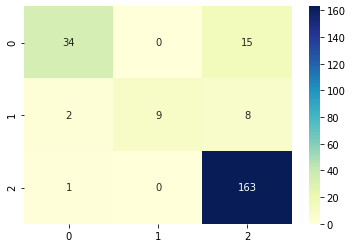

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8879310344827587

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79        49
           1       1.00      0.47      0.64        19
           2       0.88      0.99      0.93       164

    accuracy                           0.89       232
   macro avg       0.93      0.72      0.79       232
weighted avg       0.90      0.89      0.88       232



In [ ]:
# from sklearn.metrics import average_precision_score
# average_precision = average_precision_score(y_test, y_pred)

# print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
# import matplotlib.pyplot as plt

# disp = plot_precision_recall_curve(classifier, X_test, y_test)
# disp.ax_.set_title('Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

## Random Forest Classifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

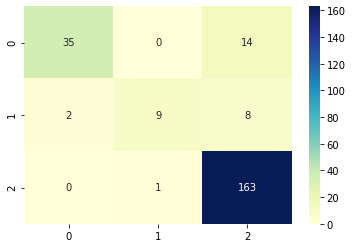

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81        49
           1       0.90      0.47      0.62        19
           2       0.88      0.99      0.93       164

    accuracy                           0.89       232
   macro avg       0.91      0.73      0.79       232
weighted avg       0.90      0.89      0.88       232



In [ ]:
#del dict

In [ ]:
#y_score = classifier.score(X_test,y_test)

In [ ]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from collections import defaultdict

# n_classes = 3
# # For each class
# precision = dict()
# recall = dict()
# average_precision = dict()
# for i in range(n_classes):
#     precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
#                                                         y_score[:, i])
#     average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# # A "micro-average": quantifying score on all classes jointly
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
#     y_score.ravel())
# average_precision["micro"] = average_precision_score(y_test, y_score,
#                                                      average="micro")
# print('Average precision score, micro-averaged over all classes: {0:0.2f}'
#       .format(average_precision["micro"]))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets


#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
#classifier = ExtraTreesClassifier()
classifier.fit(X_train,y_train)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).score(X_test,y_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

IndexError: ignored

__Comparison Matrix__

->Accuracy: (True Positive + True Negative) / Total Population

Accuracy is a ratio of correctly predicted observation to the total observations. Accuracy is the most intuitive performance measure.

True Positive: The number of correct predictions that the occurrence is positive.

True Negative: The number of correct predictions that the occurrence is negative.

->F1-Score: (2 x Precision x Recall) / (Precision + Recall)

F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.

Precision: When a positive value is predicted, how often is the prediction correct?

Recall: When the actual value is positive, how often is the prediction correct?

# SA on ratings multi-classification

In [ ]:
def combined_features(row):
    return row['review_header'] + ' '+ row['processed']
text['reviews'] = text.apply(combined_features, axis=1)
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,reviews
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...


In [ ]:
def sentiment(n):
    if n==5.0:  return 5
    elif n==4.0:  return 4
    elif n==3.0:  return 3
    elif n==2.0:  return 2
    elif n==1.0:  return 1
    else: return 0
text['ratings'] = text['review_rating'].apply(sentiment)

In [ ]:
review_5 = text[text["ratings"]==5].dropna()
review_4 = text[text["ratings"]==4].dropna()
review_3 = text[text["ratings"]==3].dropna()
review_2 = text[text["ratings"]==2].dropna()
review_1 = text[text["ratings"]==1].dropna()

## Word Cloud 

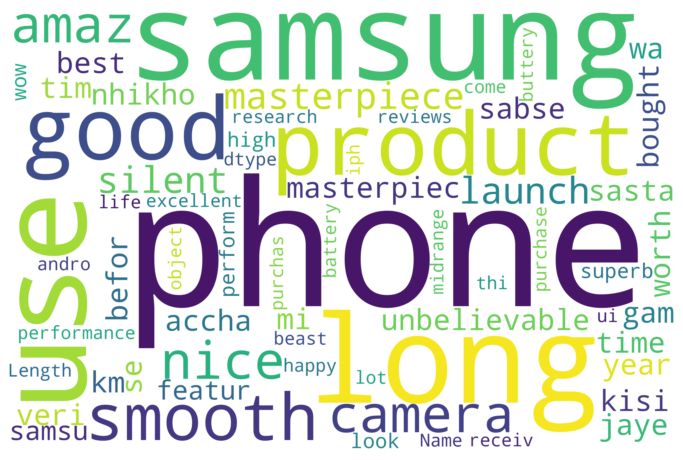

In [ ]:
#frequent words in 5 ratings 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
cloud = review_5["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

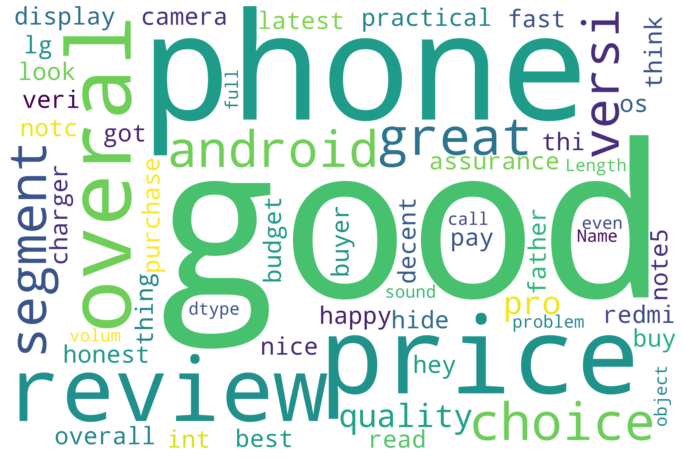

In [ ]:
#frequent words in 4 ratings 
cloud = review_4["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

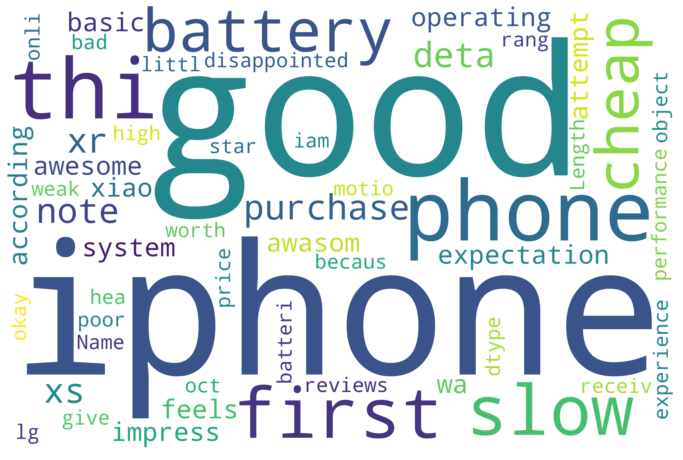

In [ ]:
#frequent words in 3 ratings
cloud = review_3["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

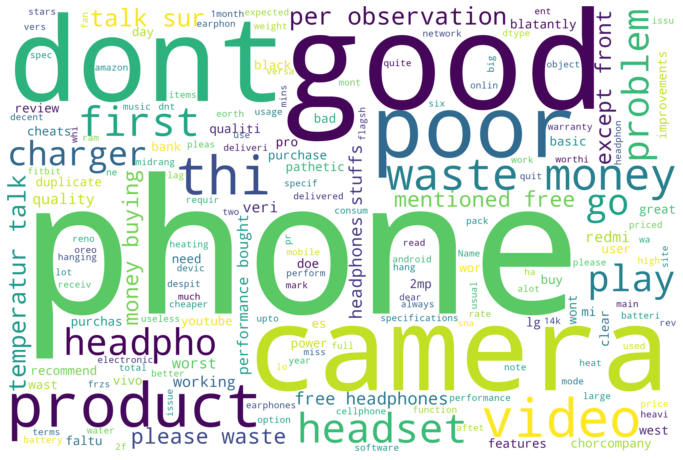

In [ ]:
#frequent words in 2 ratings 
cloud = review_2["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

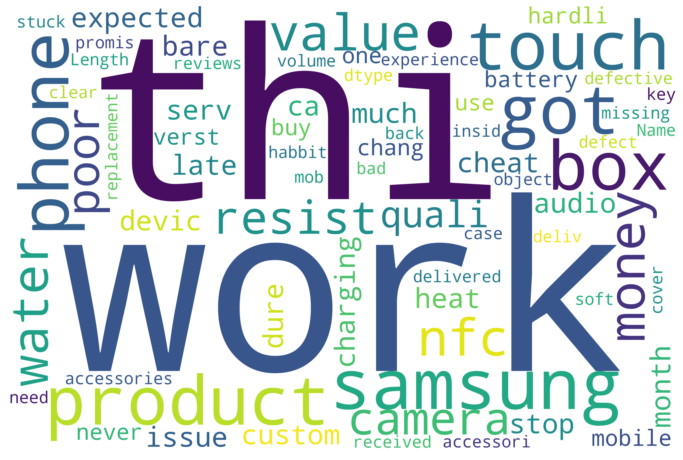

In [ ]:
#frequent words in 1 ratings
cloud = review_1["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (12, 16))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(text['reviews'])

In [ ]:
y = text['ratings']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
et = ExtraTreesClassifier()
rf = RandomForestClassifier()
dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Extra Tree',6:'Random Forest'}
models=[logreg,dt ,knn ,svc ,nb ,et ,rf ]

In [ ]:
from sklearn.model_selection import cross_val_score
for i,model in enumerate(models):
  print("{}--> Mean Accuracy--> {}".format(dict[i],cross_val_score(model,X,y,cv=15,scoring='accuracy').mean()))

Logistic Regression--> Mean Accuracy--> 0.7545121545121545
Decision Tree--> Mean Accuracy--> 0.7796647796647797
KNN--> Mean Accuracy--> 0.6905760905760906
SVC--> Mean Accuracy--> 0.828926628926629
Naive Bayes--> Mean Accuracy--> 0.604184704184704
Extra Tree--> Mean Accuracy--> 0.8393051393051394
Random Forest--> Mean Accuracy--> 0.8349761349761349


## Extra Tree Classifier

In [ ]:
classifier = ExtraTreesClassifier()
classifier.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 52,   0,   1,   0,   4],
       [  2,   6,   0,   0,   2],
       [  4,   0,  10,   0,   9],
       [  0,   1,   0,  19,  19],
       [  0,   0,   0,   0, 103]])

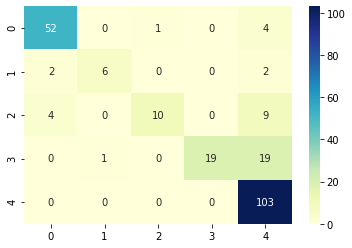

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8189655172413793

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.91      0.90        57
           2       0.86      0.60      0.71        10
           3       0.91      0.43      0.59        23
           4       1.00      0.49      0.66        39
           5       0.75      1.00      0.86       103

    accuracy                           0.82       232
   macro avg       0.88      0.69      0.74       232
weighted avg       0.85      0.82      0.80       232



## Random forest classifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

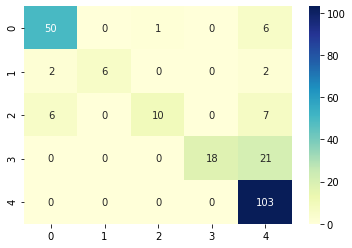

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.88      0.87        57
           2       1.00      0.60      0.75        10
           3       0.91      0.43      0.59        23
           4       1.00      0.46      0.63        39
           5       0.74      1.00      0.85       103

    accuracy                           0.81       232
   macro avg       0.90      0.67      0.74       232
weighted avg       0.84      0.81      0.79       232



# LSTM on polarity and subjectivity

In [ ]:
#text.head()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional

In [ ]:
X_lstm = text['reviews']
X_lstm

0       masterpiece silent launch masterpiec samsung a...
1       value money nfc water resist poor camera quali...
2       redmi note 7 pro much better thi phone quit go...
3       good phone happy practical honest review redmi...
4       best phone year wa use mi phone befor long tim...
                              ...                        
1665    accessories delivered accessori promis deliv p...
1666    defective product need replacement got thi mob...
1667    note5 pro problem even full call volum sound c...
1668    touch work phone thi phone bad touch work thi ...
1669    back cover missing box got box clear soft case...
Name: reviews, Length: 1157, dtype: object

In [ ]:
y_lstm = text['encode']

In [ ]:
vocab_size = 5000 
embedding_dim = 64
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' #OOV = Out of Vocabulary

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_lstm)
word_index = tokenizer.word_index

In [ ]:
print(word_index)

{'<OOV>': 1, 'phone': 2, 'thi': 3, 'good': 4, 'camera': 5, 'use': 6, 'batteri': 7, 'veri': 8, 'qualiti': 9, 'product': 10, 'one': 11, 'price': 12, 'like': 13, 'ha': 14, 'charg': 15, 'day': 16, 'wa': 17, 'buy': 18, 'also': 19, 'display': 20, 'mobil': 21, 'work': 22, 'screen': 23, 'time': 24, 'amazon': 25, 'best': 26, 'perform': 27, 'great': 28, 'even': 29, 'get': 30, 'better': 31, 'look': 32, 'band': 33, 'sound': 34, 'go': 35, 'pro': 36, 'iphon': 37, 'money': 38, 'onli': 39, 'issu': 40, 'got': 41, 'last': 42, 'honor': 43, 'featur': 44, 'mi': 45, 'devic': 46, 'fast': 47, 'review': 48, 'ani': 49, 'give': 50, 'xr': 51, 'realli': 52, 'face': 53, 'bad': 54, 'updat': 55, 'call': 56, 'hour': 57, 'purchas': 58, 'awesom': 59, 'feel': 60, 'xs': 61, 'app': 62, 'doe': 63, 'back': 64, 'problem': 65, 'x': 66, 'earphon': 67, 'nice': 68, 'support': 69, 'much': 70, 'video': 71, 'front': 72, 'mode': 73, 'take': 74, 'life': 75, 'servic': 76, 'game': 77, 'replac': 78, 'light': 79, 'compar': 80, 'come': 81,

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_lstm)

In [ ]:
#train_sequences

In [ ]:
#embedding representation
max_length = 200
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
train_padded

array([[2626, 1217,  538, ...,    3,  100, 1061],
       [ 381,   38, 2021, ...,    0,    0,    0],
       [ 127,  125, 1486, ...,    0,    0,    0],
       ...,
       [1670,   36,   65, ...,    0,    0,    0],
       [ 185,   22,    2, ...,    0,    0,    0],
       [  64,  305, 1671, ...,    0,    0,    0]], dtype=int32)

In [ ]:
import numpy as np
X_final=np.array(train_padded)
y_final=np.array(y_lstm)

In [ ]:
X_final.shape,y_final.shape

((1157, 200), (1157,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_final, y_final, test_size=0.2, random_state=0)

## Bidirectional LSTM

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 386,435
Trainable params: 386,435
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
num_epochs = 10
history = model.fit(X_train_lstm, y_train_lstm, epochs=num_epochs, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

Epoch 1/10
29/29 - 12s - loss: 0.8169 - accuracy: 0.7330 - val_loss: 0.7634 - val_accuracy: 0.7069
Epoch 2/10
29/29 - 7s - loss: 0.6041 - accuracy: 0.7600 - val_loss: 0.7224 - val_accuracy: 0.7328
Epoch 3/10
29/29 - 7s - loss: 0.4343 - accuracy: 0.8465 - val_loss: 0.5802 - val_accuracy: 0.7974
Epoch 4/10
29/29 - 7s - loss: 0.2906 - accuracy: 0.9146 - val_loss: 0.4001 - val_accuracy: 0.8578
Epoch 5/10
29/29 - 7s - loss: 0.2664 - accuracy: 0.9200 - val_loss: 0.4892 - val_accuracy: 0.8405
Epoch 6/10
29/29 - 7s - loss: 0.1947 - accuracy: 0.9297 - val_loss: 0.3676 - val_accuracy: 0.8448
Epoch 7/10
29/29 - 7s - loss: 0.1430 - accuracy: 0.9362 - val_loss: 0.4064 - val_accuracy: 0.8534
Epoch 8/10
29/29 - 7s - loss: 0.0973 - accuracy: 0.9568 - val_loss: 0.3883 - val_accuracy: 0.8664
Epoch 9/10
29/29 - 6s - loss: 0.0861 - accuracy: 0.9859 - val_loss: 0.3441 - val_accuracy: 0.8966
Epoch 10/10
29/29 - 6s - loss: 0.0705 - accuracy: 0.9870 - val_loss: 0.3466 - val_accuracy: 0.9009


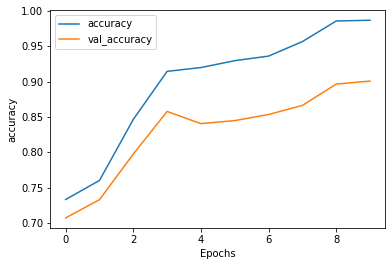

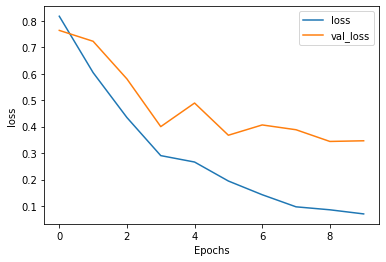

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Simple LSTM

In [ ]:
## Creating model
model1=Sequential()
model1.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model1.add(Dropout(0.3))
model1.add(LSTM(100))
model1.add(Dropout(0.3))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 386,303
Trainable params: 386,303
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 10
history1 = model1.fit(X_train_lstm, y_train_lstm, epochs=num_epochs, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

Epoch 1/10
29/29 - 8s - loss: 0.8040 - accuracy: 0.7514 - val_loss: 0.7853 - val_accuracy: 0.7069
Epoch 2/10
29/29 - 6s - loss: 0.7062 - accuracy: 0.7557 - val_loss: 0.8260 - val_accuracy: 0.7069
Epoch 3/10
29/29 - 6s - loss: 0.7063 - accuracy: 0.7557 - val_loss: 0.7872 - val_accuracy: 0.7069
Epoch 4/10
29/29 - 6s - loss: 0.7066 - accuracy: 0.7557 - val_loss: 0.7922 - val_accuracy: 0.7069
Epoch 5/10
29/29 - 6s - loss: 0.6985 - accuracy: 0.7557 - val_loss: 0.8042 - val_accuracy: 0.7069
Epoch 6/10
29/29 - 6s - loss: 0.6945 - accuracy: 0.7557 - val_loss: 0.8041 - val_accuracy: 0.7069
Epoch 7/10
29/29 - 6s - loss: 0.7014 - accuracy: 0.7557 - val_loss: 0.8099 - val_accuracy: 0.7069
Epoch 8/10
29/29 - 6s - loss: 0.6989 - accuracy: 0.7557 - val_loss: 0.8049 - val_accuracy: 0.7069
Epoch 9/10
29/29 - 6s - loss: 0.6935 - accuracy: 0.7557 - val_loss: 0.7795 - val_accuracy: 0.7069
Epoch 10/10
29/29 - 5s - loss: 0.6941 - accuracy: 0.7557 - val_loss: 0.7880 - val_accuracy: 0.7069


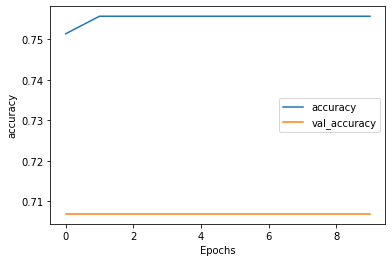

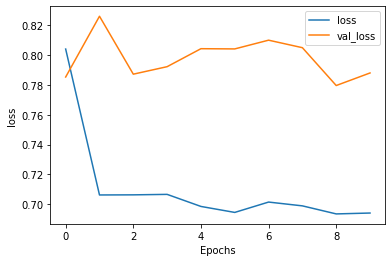

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

## Test

In [ ]:
txt = ["masterpiece silent launch masterpiec samsung ad fear sale hurryingli releas beat redmi note anyway let us see pro con pro display best display market till date known fact internet sourc samsung manufactur display iphon world costliest phone."]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['negative', 'neutral', 'positive'] 

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

[[0.20567042 0.5824965  0.21183302]]
1
negative


In [ ]:
text['reviews'][0]

'masterpiece silent launch masterpiec samsung ad fear sale hurryingli releas beat redmi note anyway let us see pro con pro display best display market till date known fact internet sourc samsung manufactur display iphon world costliest phone usual stand superb thi super amol display full backup beast mah batteri last day light user day moder user day heavi user full screen display almost full small perfectli place camera middl u notch felt thi far better abnorm camera placement seri fantast camera light whether rear camera front camera excel produc mp pic see sampl shot imag lord krishna great design usual seri samsung alway look veri premium thi look premium screen protect search net though thi doe gorilla glass doe asahi dragon trail glass also rug come protect charg first time samsung ha provid charger veri faster charger meant thi price point ui samsung new one touch ui great veri nice custom price dead cheap samsung ha decid veri aggress market thi price one blindli go thi con cam

# LSTM on Ratings

In [ ]:
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,reviews,polarity,subjectivity,analysis,encode
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...,0.221396,0.464330,Positive,2
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...,-0.016667,0.530556,Negative,0
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...,0.350000,0.650000,Positive,2
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...,0.301146,0.537611,Positive,2
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...,0.737500,0.325000,Positive,2


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional

In [ ]:
X_rlstm = text['reviews']

In [ ]:
def sentiment(n):
    if n==5.0:  return 5
    elif n==4.0:  return 4
    elif n==3.0:  return 3
    elif n==2.0:  return 2
    elif n==1.0:  return 1
    else: return 0
text['ratings'] = text['review_rating'].apply(sentiment)

In [ ]:
y_rlstm = text['ratings']

In [ ]:
vocab_size = 5000 
embedding_dim = 64
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' #OOV = Out of Vocabulary

In [ ]:
rtokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
rtokenizer.fit_on_texts(X_rlstm)
word_index = rtokenizer.word_index

In [ ]:
rtrain_sequences = rtokenizer.texts_to_sequences(X_rlstm)

In [ ]:
#embedding representation
max_length = 200
rtrain_padded = pad_sequences(rtrain_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np
X_rfinal=np.array(rtrain_padded)
y_rfinal=np.array(y_rlstm)

In [ ]:
X_rfinal.shape , y_rfinal.shape

((1157, 200), (1157,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train_rlstm, X_test_rlstm, y_train_rlstm, y_test_rlstm = train_test_split(X_rfinal, y_rfinal, test_size=0.2, random_state=0)

## Bidirectional LSTM

In [ ]:
modelr = Sequential()
modelr.add(Embedding(vocab_size, embedding_dim))
modelr.add(Dropout(0.5))
modelr.add(Bidirectional(LSTM(embedding_dim)))
modelr.add(Dense(6, activation='softmax'))
modelr.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 386,822
Trainable params: 386,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
modelr.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
num_epochs = 10
rhistory = modelr.fit(X_train_rlstm, y_train_rlstm, epochs=num_epochs, validation_data=(X_test_rlstm, y_test_rlstm), verbose=1)

Epoch 1/10
29/29 [==============================] - 12s 279ms/step - loss: 1.5228 - accuracy: 0.4465 - val_loss: 1.3796 - val_accuracy: 0.4440
Epoch 2/10
29/29 [==============================] - 7s 246ms/step - loss: 1.3068 - accuracy: 0.4800 - val_loss: 1.2589 - val_accuracy: 0.6078
Epoch 3/10
29/29 [==============================] - 7s 235ms/step - loss: 1.0312 - accuracy: 0.6659 - val_loss: 0.9770 - val_accuracy: 0.6595
Epoch 4/10
29/29 [==============================] - 7s 248ms/step - loss: 0.7812 - accuracy: 0.7070 - val_loss: 0.9101 - val_accuracy: 0.6681
Epoch 5/10
29/29 [==============================] - 7s 241ms/step - loss: 0.6144 - accuracy: 0.7708 - val_loss: 0.8114 - val_accuracy: 0.7026
Epoch 6/10
29/29 [==============================] - 7s 240ms/step - loss: 0.4983 - accuracy: 0.8314 - val_loss: 0.8482 - val_accuracy: 0.7328
Epoch 7/10
29/29 [==============================] - 7s 240ms/step - loss: 0.4078 - accuracy: 0.8681 - val_loss: 0.7401 - val_accuracy: 0.7371
Epoch

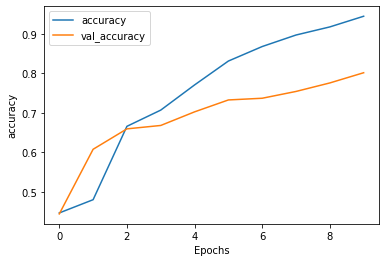

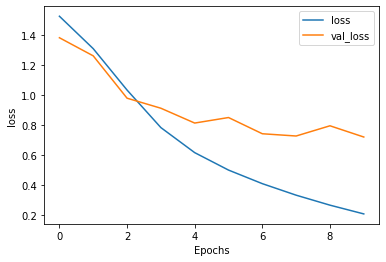

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(rhistory, "accuracy")
plot_graphs(rhistory, "loss")

## Simple LSTM

In [ ]:
modelr1=Sequential()
modelr1.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
modelr1.add(Dropout(0.3))
modelr1.add(LSTM(100))
modelr1.add(Dropout(0.3))
modelr1.add(Dense(6,activation='softmax'))
modelr1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(modelr1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 386,606
Trainable params: 386,606
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 10
rhistory1 = modelr1.fit(X_train_rlstm, y_train_rlstm, epochs=num_epochs, validation_data=(X_test_rlstm, y_test_rlstm), verbose=1)

Epoch 1/10
29/29 [==============================] - 9s 228ms/step - loss: 1.5092 - accuracy: 0.4508 - val_loss: 1.3966 - val_accuracy: 0.4440
Epoch 2/10
29/29 [==============================] - 6s 202ms/step - loss: 1.3889 - accuracy: 0.4530 - val_loss: 1.3859 - val_accuracy: 0.4440
Epoch 3/10
29/29 [==============================] - 6s 191ms/step - loss: 1.3864 - accuracy: 0.4616 - val_loss: 1.3875 - val_accuracy: 0.4440
Epoch 4/10
29/29 [==============================] - 6s 191ms/step - loss: 1.3706 - accuracy: 0.4595 - val_loss: 1.3811 - val_accuracy: 0.4483
Epoch 5/10
29/29 [==============================] - 6s 207ms/step - loss: 1.3681 - accuracy: 0.4659 - val_loss: 1.3740 - val_accuracy: 0.4483
Epoch 6/10
29/29 [==============================] - 6s 208ms/step - loss: 1.3600 - accuracy: 0.4714 - val_loss: 1.3661 - val_accuracy: 0.4526
Epoch 7/10
29/29 [==============================] - 6s 206ms/step - loss: 1.3350 - accuracy: 0.4746 - val_loss: 1.3662 - val_accuracy: 0.4526
Epoch 

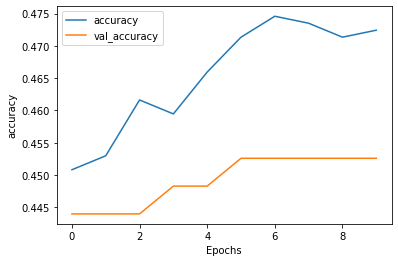

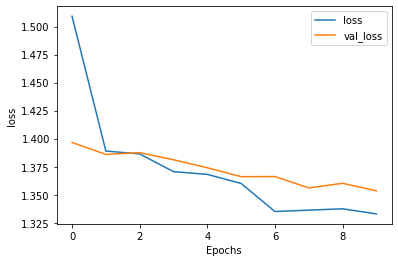

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(rhistory1, "accuracy")
plot_graphs(rhistory1, "loss")

## Test

In [ ]:
txt = ["masterpiece silent launch masterpiec samsung ad fear sale hurryingli releas beat redmi note anyway let us see pro con pro display best display market till date known fact internet sourc samsung manufactur display iphon world costliest phone."]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = modelr.predict(padded)
labels = ['0','1', '2', '3','4','5'] 

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

[[0.00161843 0.02794514 0.03420012 0.16941921 0.17121916 0.595598  ]]
5
4


# SA on ratings

In [ ]:
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...


In [ ]:
# text['Unnamed: 0'].head()

In [ ]:
def combined_features(row):
    return row['review_header'] + ' '+ row['processed']
text['all_features'] = text.apply(combined_features, axis=1)
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,all_features
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...


In [ ]:
from textblob import TextBlob

text['all_features'] = text['all_features'] .astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


text['polarity'] = text['all_features'] .apply(pol)
text['subjectivity'] = text['all_features'] .apply(sub)
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,all_features,polarity,subjectivity
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...,0.221396,0.464330
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...,-0.016667,0.530556
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...,0.350000,0.650000
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...,0.301146,0.537611
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...,0.737500,0.325000


In [ ]:
text = text[text['review_rating'] != 3.0]

In [ ]:
#denoting good review rating as 1 and bad rating as 0
def sentiment(n):
    return 1 if n >= 4.0 else 0
text['sentiment'] = text['review_rating'].apply(sentiment)
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,all_features,polarity,subjectivity,sentiment
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...,0.221396,0.464330,1
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...,-0.016667,0.530556,0
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...,0.350000,0.650000,0
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...,0.301146,0.537611,1
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...,0.737500,0.325000,1


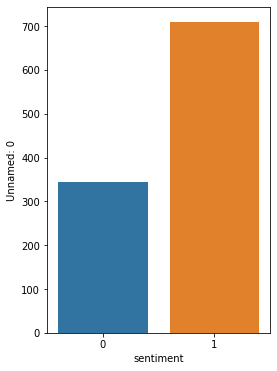

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
a = text.groupby(['sentiment'])['Unnamed: 0'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'number of samples'})
fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x='sentiment', y='Unnamed: 0', data=a)

In [ ]:
print('Number of good reviews: {}'.format(a.loc[text['sentiment']==1]['Unnamed: 0'].values[0]))
print('Number of bad reviews: {}'.format(a.loc[text['sentiment']==0]['Unnamed: 0'].values[0]))

Number of good reviews: 344
Number of bad reviews: 709


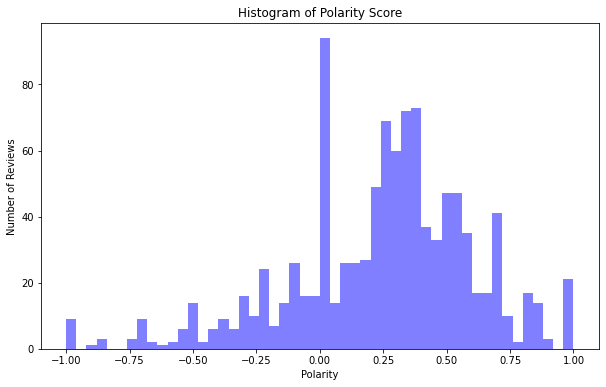

In [ ]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(text.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

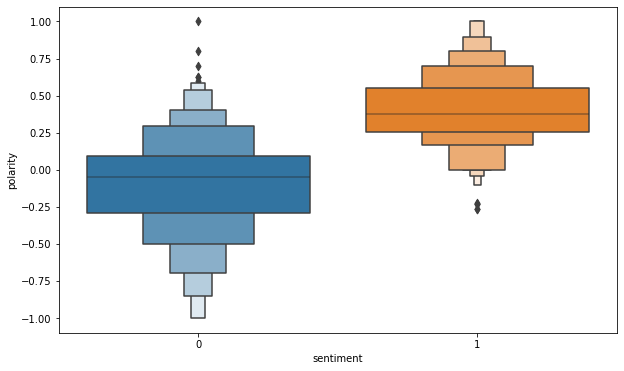

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='sentiment', y='polarity', data=text)
plt.show();

It can be observed that good reviews (sentiment =1) have higher polarity compared to bad reviews. Also, negative reviews also have higher number of negative polarity reviews. 


In [ ]:
text.loc[(text.polarity == 1 & (text.sentiment == 0))].all_features.head(10).tolist()

['sasta sabse accha kisi se km nhikho jaye gam nhi purchas thi phone uncl amaz dual sim',
 'five stars amaz color',
 'android version freez occasion',
 'headphones headphon',
 'gud mobile thi mobil ha gud compani need launch inch screen inbuild batteri aur requir',
 'earphone jack earphon jack',
 'sasta sabse accha kisi se km nhikho jaye gam nhi purchas thi phone uncl amaz dual sim',
 'five stars amaz color',
 'exchange offee exchang offer',
 'gud mobile thi mobil ha gud compani need launch inch screen inbuild batteri aur requir']

Reviews that have polarity 1(positive ) and sentiment is 0(bad reviews)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

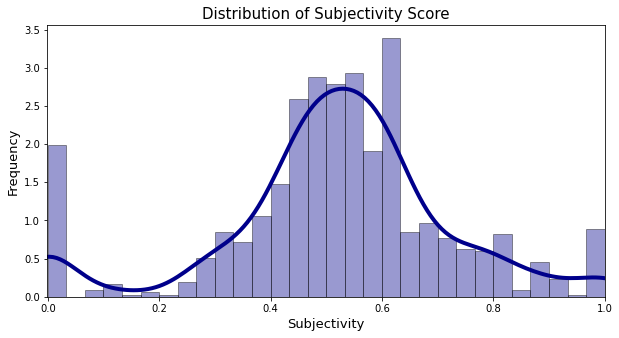

In [ ]:
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
plt.figure(figsize=(10,5))
sns.distplot(text['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

When it is close to 0, it is more about facts. When subjectivity increases, it comes close to be an opinion. In the data set, the distribution of subjectivity scores for the reviews are similar to a normal distribution.

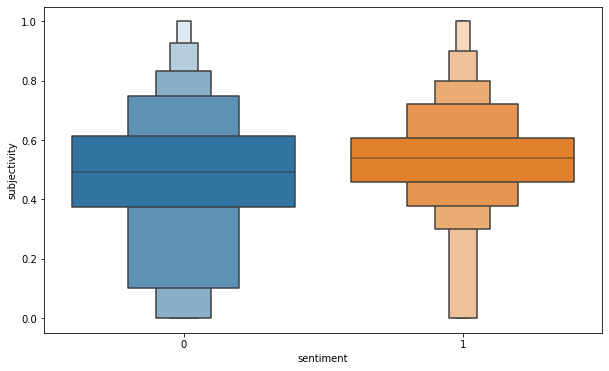

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='sentiment', y='subjectivity', data=text)
plt.show();

In [ ]:
text.loc[(text["sentiment"] == 0) & (text.polarity == 1 ) & (text.subjectivity ==1)].all_features.head(10).tolist()

[]

There are no reviews that have polarity 1(positive sentiment), subjectivity 1(opinion) and bad review (sentiment=0)

In [ ]:
text.loc[(text["sentiment"] == 1) & (text.polarity == 1 ) & (text.subjectivity ==1)].all_features.head(10).tolist()

['superb superb',
 'excellent product veri excel',
 'awesome mobile price point awesom mobil thi price point',
 'beast range awesom product thi price rang camera perfect',
 'awesome awesom']

Reviews that have polarity 1(positive sentiment), subjectivity 1(opinion) and good review (sentiment=1)

In [ ]:
text.loc[(text["sentiment"] == 1) & (text.polarity == -1 ) & (text.subjectivity ==1)].all_features.head(10).tolist()

[]

There are no reviews that have polarity -1(negative sentiment), subjectivity 1(opinion) and bad review (sentiment=0)

In [ ]:
text['review_len'] = text['all_features'].astype(str).apply(len)
text['word_count'] = text['all_features'].apply(lambda x: len(str(x).split()))

In [ ]:
text.head()

,Unnamed: 0,review_header,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,all_features,polarity,subjectivity,sentiment,review_len,word_count
0,0,masterpiece,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,masterpiece silent launch masterpiec samsung a...,0.221396,0.464330,1,1912,315
1,1,value money,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,value money nfc water resist poor camera quali...,-0.016667,0.530556,0,133,22
2,2,redmi note 7 pro much better,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,redmi note 7 pro much better thi phone quit go...,0.350000,0.650000,0,150,27
3,3,good phone happy practical honest review,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,good phone happy practical honest review redmi...,0.301146,0.537611,1,2689,455
4,4,best phone year,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,best phone year wa use mi phone befor long tim...,0.737500,0.325000,1,291,50


In [ ]:
from collections import defaultdict
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
%matplotlib inline
#Filtering data
review_pos = text[text["sentiment"]==1]
review_neg = text[text["sentiment"]==0]
#review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation 
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart 
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["all_features"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["all_features"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["all_features"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["all_features"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Negative reviews"
                                          ])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)


fig['layout'].update(height=900, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["all_features"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["all_features"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Trigram plots of Positive reviews", 
                                          "Trigram plots of Negative reviews"
                                          ])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)


fig['layout'].update(height=900, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



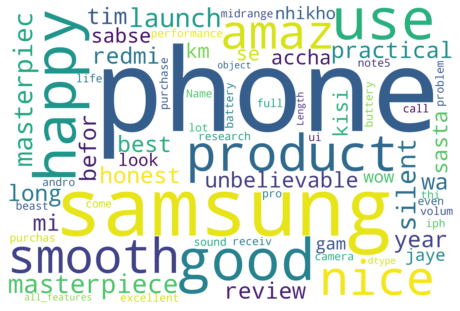

In [ ]:
cloud = review_pos["all_features"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (8, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

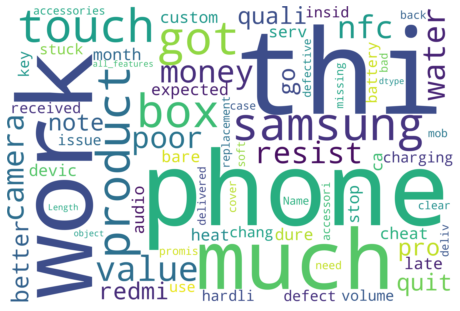

In [ ]:
cloud = review_neg["all_features"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(cloud))
fig = plt.figure(
    figsize = (8, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Sentiment analysis

In [ ]:
text = text[text['review_rating'] != 3.0]

In [ ]:
#denote positive sentiments as 1 and negative sentiments as 0
def sentiment(n):
    return 1 if n >= 4.0 else 0
text['sentiment'] = text['review_rating'].apply(sentiment)
text.head()


,Unnamed: 0,name,url,price,review_date,review_header,review_author,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,sentiment
0,0,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,masterpiece,Govinda Dasa,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,1
1,1,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,value money,Mukesh,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,0
2,2,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,01 Mar 2019,redmi note 7 pro much better,Aman,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,0
3,3,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,24 Mar 2019,good phone happy practical honest review,Kindle Customer,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,1
4,4,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,best phone year,shalin patel,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,1


In [ ]:
def combined_features(row):
    return row['review_header'] + ' '+ row['processed']
text['all_features'] = text.apply(combined_features, axis=1)
text.head()

,Unnamed: 0,name,url,price,review_date,review_header,review_author,reviews_text,review_rating,words,stemmed_words,stem_meaningful,processed,sentiment,all_features
0,0,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,masterpiece,Govinda Dasa,a silently launched masterpiece by samsung. no...,5.0,"[a, silently, launched, masterpiece, by, samsu...","[a, silent, launch, masterpiec, by, samsung, n...","[silent, launch, masterpiec, samsung, ad, fear...",silent launch masterpiec samsung ad fear sale ...,1,masterpiece silent launch masterpiec samsung a...
1,1,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,value money,Mukesh,no nfc no water resistance poor camera quality...,1.0,"[no, nfc, no, water, resistance, poor, camera,...","[no, nfc, no, water, resist, poor, camera, qua...","[nfc, water, resist, poor, camera, qualiti, fr...",nfc water resist poor camera qualiti front cam...,0,value money nfc water resist poor camera quali...
2,2,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,01 Mar 2019,redmi note 7 pro much better,Aman,this phone is quite good but i think i have ch...,2.0,"[this, phone, is, quite, good, but, i, think, ...","[thi, phone, is, quit, good, but, i, think, i,...","[thi, phone, quit, good, think, choosen, wrong...",thi phone quit good think choosen wrong devic ...,0,redmi note 7 pro much better thi phone quit go...
3,3,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,24 Mar 2019,good phone happy practical honest review,Kindle Customer,i had redmi note 5 pro and i wanted to buy red...,4.0,"[i, had, redmi, note, pro, and, i, wanted, to,...","[i, had, redmi, note, pro, and, i, want, to, b...","[redmi, note, pro, want, buy, redmi, note, pro...",redmi note pro want buy redmi note pro got rea...,1,good phone happy practical honest review redmi...
4,4,"Samsung Galaxy A50 (Blue, 4GB RAM, 64GB Storag...",https://www.amazon.in/dp/B07KXBMYCW,₹ 16999.00,05 Mar 2019,best phone year,shalin patel,i was use of mi phone before a long time...but...,5.0,"[i, was, use, of, mi, phone, before, a, long, ...","[i, wa, use, of, mi, phone, befor, a, long, ti...","[wa, use, mi, phone, befor, long, time, one, d...",wa use mi phone befor long time one day friend...,1,best phone year wa use mi phone befor long tim...


In [ ]:
text['sentiment'].value_counts()

1    709
0    344
Name: sentiment, dtype: int64

In [ ]:
X = text['all_features']
y = text['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_class = model.predict(X_test_dtm)

In [ ]:
accuracy_score(y_test, y_pred_class)

0.946969696969697

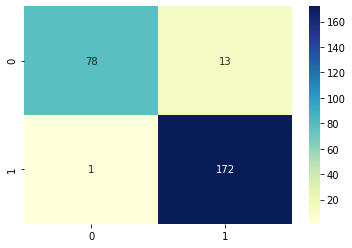

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred_class)
#plot_confusion_matrix(X=y_test,y_true=y_pred_class, labels=['Negative','Positive'])
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
#from sklearn.cross_validation import cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Classifiers = [
    LogisticRegression(C=0.001,multi_class='multinomial',max_iter=10,solver='sag', tol=1e-1),
    
    RandomForestClassifier(n_estimators=200, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs= -1,
            oob_score=False, random_state=10),
    
    AdaBoostClassifier(n_estimators=100, random_state=10),
    
    BernoulliNB(),
    
    MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
    
    KNeighborsClassifier(algorithm='auto', metric='minkowski',
           metric_params=None, n_neighbors=2, p=2,
           weights='uniform'),
    
    tree.DecisionTreeClassifier(),
    
    ensemble.ExtraTreesClassifier(n_estimators=100,
                                  max_features= 50,
                                  criterion= 'entropy'),
    
    ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001,n_estimators=50,presort='auto', random_state=None, verbose = 0)]


In [ ]:
dense_features=ctmTr.toarray()
dense_test= X_test_dtm.toarray()
Accuracy=[]
Model=[]
print("Entering into the Classifiers: =========================================")
for classifier in Classifiers:
    try:
        fit = classifier.fit(ctmTr, y_train)
        y_pred_class = fit.predict(X_test_dtm)
    except Exception:
        fit = classifier.fit(ctmTr, y_train)
        y_pred_class = fit.predict(X_test_dtm)
    accuracy = accuracy_score(y_test, y_pred_class)
    print("====================================================================")
    print("********************************************************************")
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print("********************************************************************")
    print("====================================================================")
    Accuracy.append(accuracy)
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred_class)))
    cm = metrics.confusion_matrix(y_test, y_pred_class)
    print("--------------------------------------------------------------------")
    print("Confusion matrix:\n%s" % cm)
    print("--------------------------------------------------------------------")
    Model.append(classifier.__class__.__name__)
    print("********************************************************************")
    print("====================================================================")


Entering into the Classifiers: =========================================
********************************************************************
Accuracy of LogisticRegressionis 0.8295454545454546
********************************************************************
Classification report for classifier LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.1, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       1.00      0.51      0.67        91
           1       0.79      1.00      0.88       173

    accuracy                           0.83       264
   macro avg       0.90      0.75      0.78       264
weighted avg       0.86      0.83      0.81       264


------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


********************************************************************
Accuracy of GradientBoostingClassifieris 0.6553030303030303
********************************************************************
Classification report for classifier GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False):
              precision    recall  f1-score   support

           0     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ploting the Model Performances: ========================================


Text(0.5, 1.0, 'Accuracies of Models')

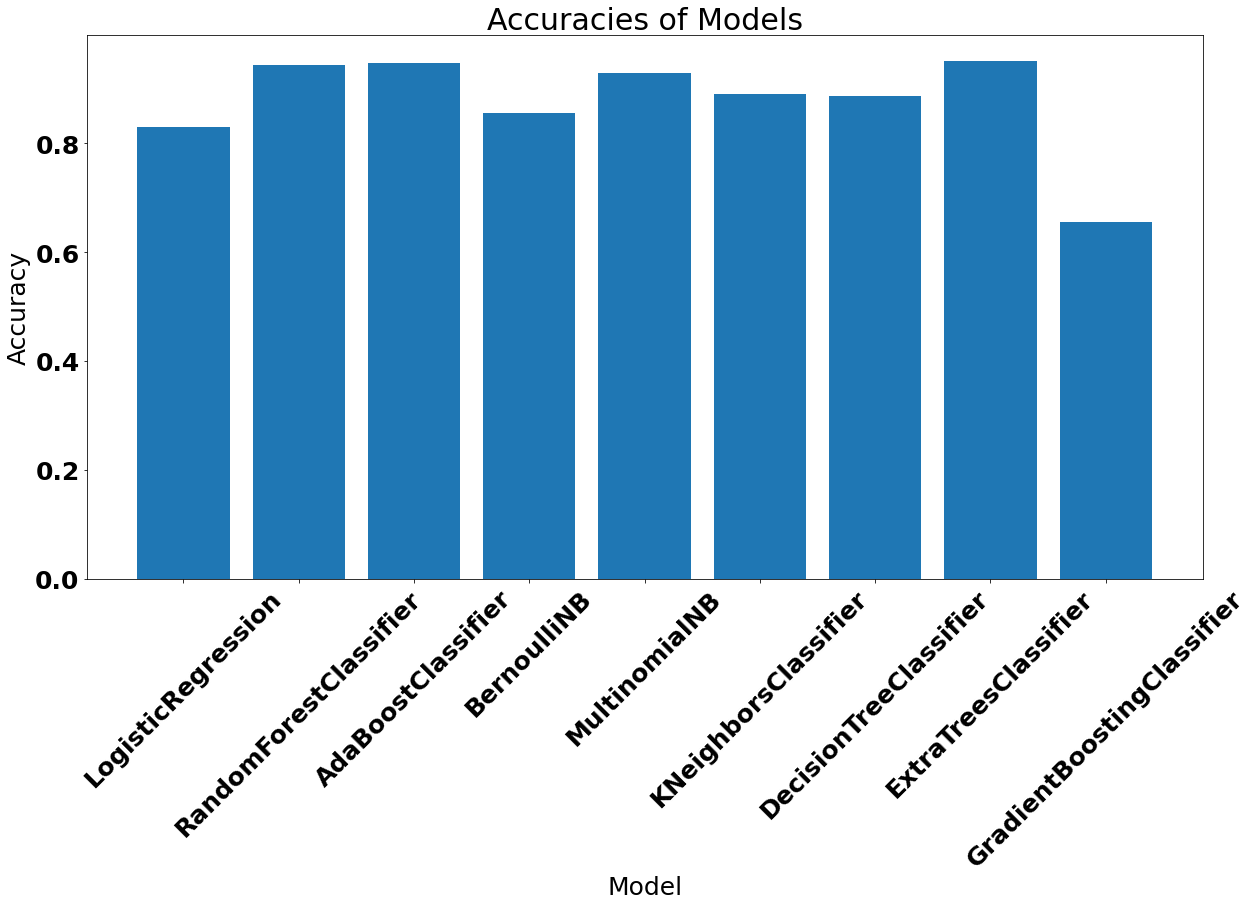

In [ ]:
import matplotlib.pyplot as plt
print("Ploting the Model Performances: ========================================")
Index = [1,2,3,4,5,6,7,8,9]
plt.figure(1,figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)

plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [ ]:
#accuracy of extra tree classifier is highest

In [ ]:
%%shell
jupyter nbconvert --to html /content/Fake_reviews.ipynb

[NbConvertApp] Converting notebook /content/Fake_reviews.ipynb to html
[NbConvertApp] Writing 4259636 bytes to /content/Fake_reviews.html
